In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas_profiling import ProfileReport

# Načítanie a úprava dát z csv súborov.

In [177]:
def strip_columns(dataframe):
    for column_name in dataframe:
        if dataframe[column_name].dtypes == 'object':
            dataframe[column_name] = dataframe[column_name].str.strip()
        
    return dataframe

# other_train
df_other = pd.read_csv('./other_train.csv', sep=',', index_col=0) # First column is Unnamed
df_other = strip_columns(df_other)

In [178]:
df_other.info() # There are 22 columns. 10 atributes are float type and 12 are object.
# All columns expect name and adress have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3971 non-null   object 
 3   marital-status    3709 non-null   object 
 4   occupation        3968 non-null   object 
 5   pregnant          3967 non-null   object 
 6   education-num     3971 non-null   float64
 7   relationship      3972 non-null   object 
 8   skewness_glucose  3968 non-null   float64
 9   mean_glucose      3974 non-null   float64
 10  capital-gain      3964 non-null   float64
 11  kurtosis_glucose  3970 non-null   float64
 12  education         3969 non-null   object 
 13  fnlwgt            3965 non-null   float64
 14  class             3972 non-null   float64
 15  std_glucose       3966 non-null   float64
 16  income            3971 non-null   object 


V datasete je 22 atribútov, pričom 10 z nich sú typu float a zvyšných 12 je typu object.
Všetky stĺpce okrem name a adress majú chýbajúce hodnoty.

In [179]:
df_other.describe()

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss
count,3971.000000,3968.000000,3974.000000,3964.000000,3970.000000,3.965000e+03,3972.000000,3966.000000,3971.000000,3971.000000
mean,10.065223,4.233223,69.173141,1228.128406,0.952248,1.911784e+05,0.256294,45.172793,40.505162,73.254092
std,2.671998,9.715162,3348.917032,8623.958204,1.614087,1.072410e+05,0.436641,7.621144,12.279149,369.551911
min,1.000000,-1.755332,-18973.437500,0.000000,-1.641515,1.882700e+04,0.000000,25.695250,1.000000,0.000000
25%,9.000000,-0.120081,83.955078,0.000000,0.070311,1.179830e+05,0.000000,40.151488,40.000000,0.000000
50%,10.000000,0.376026,110.613281,0.000000,0.311092,1.795090e+05,0.000000,45.878359,40.000000,0.000000
75%,13.000000,2.090854,125.382812,0.000000,0.776492,2.415230e+05,1.000000,50.350939,45.000000,0.000000
max,16.000000,68.101622,15887.500000,99999.000000,8.069522,1.366120e+06,1.000000,91.206475,99.000000,2824.000000


Štatistické údaje nie sú moc veľa vravné, pretože v nich sú celkom extrémne hodnoty.

In [180]:
df_other.head() 

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,David Hayes,235 Jennifer Throughway Suite 569\r\nNew Antho...,Black,??,Prof-specialty,f,5.0,Not-in-family,-0.197692,141.359375,0.0,-0.252430,9th,175431.0,0.0,49.842053,<=50K,"{'mean_oxygen':'4.04264214','std_oxygen':'19.4...",United-States,40.0,0.0,Private
1,Stanley Benny,"08954 Johnson Course\r\nNew Lauraville, NV 22019",White,Married-civ-spouse,Exec-managerial,f,13.0,Husband,16.019670,53.968750,0.0,3.149333,Bachelors,66473.0,1.0,31.900220,>50K,"{'mean_oxygen':'9.294314381','std_oxygen':'35....",United-States,40.0,0.0,Private
2,Domingo Labriola,"36319 Wiley Drive Suite 094\r\nSouth Michael, ...",Asian-Pac-Islander,Married-civ-spouse,Farming-fishing,f,3.0,Husband,21.803837,2257.812500,0.0,4.650770,5th-6th,93206.0,1.0,35.793158,<=50K,"{'mean_oxygen':'138.7876254','std_oxygen':'79....",Philippines,40.0,0.0,Private
3,Ronnie Moore,"0755 Soto Oval Apt. 443\r\nWest Markside, TX 3...",White,Never-married,Other-service,FALSE,10.0,Not-in-family,-0.112191,110.046875,0.0,0.441957,Some-college,137604.0,0.0,53.876575,<=50K,"{'mean_oxygen':'3.100334448','std_oxygen':'17....",United-States,40.0,0.0,Private
4,Victor Mcjunkin,"95738 Keller Overpass\r\nKennedyland, MO 71071",White,NaN,Adm-clerical,f,10.0,Not-in-family,-0.309642,137.960938,0.0,-0.048518,Some-college,174592.0,0.0,51.885451,<=50K,"{'mean_oxygen':'4.203177258','std_oxygen':'23....",United-States,40.0,0.0,Private


medical_info je komplexný objekt, ktorý môže byť rozdelený do viacerých stĺpcov.

In [181]:
df_other.shape[0] - df_other.dropna().shape[0]

337

Dataframe obsahuje 337 chýbajcich hodnôt.

In [182]:
def adjust_dataframe_columns(dataframe):
    dataframe['marital-status'] = dataframe['marital-status'].replace('??', np.nan)
    dataframe['occupation'] = dataframe['occupation'].replace('?', np.nan)
    dataframe['pregnant'] = dataframe['pregnant'].replace(['f', 'F', 'FALSE'], 'False')
    dataframe['pregnant'] = dataframe['pregnant'].replace(['t', 'T', 'TRUE'], 'True')
    dataframe['relationship'] = dataframe['relationship'].replace('Not_in_family', 'Not-in-family')
    dataframe['relationship'] = dataframe['relationship'].replace('Own_child', 'Own-child')
    dataframe['relationship'] = dataframe['relationship'].replace('Other_relative', 'Other-relative')
    dataframe['native-country'] = dataframe['native-country'].replace('?', np.nan)
    dataframe['workclass'] = dataframe['workclass'].replace('?', np.nan)

    return dataframe

df_other = adjust_dataframe_columns(df_other)

V prvej fáze sme zanalyzovali, v ktorých stĺpcoch sa nachádzajú aké unikátne hodnoty. Tie, ktoré nám nič nehovorili ako napríklad otázniky sme nahradili hodnotami np.nan aby sa nám jednoduchšie nahrádzali. V prípade, keď stĺpec obsahoval viacero hodnôt, ktoré hovorili to isté, len boli inak napísené, tak sme ich nahradili jednotným označním(napríklad 'f', 'F', 'False' majú teraz jednotné označenie 'False'). 

In [183]:
def separate_and_delete_medical_info(dataframe):
    df2 = pd.DataFrame() 
    # Iterate through every row and take values from medical_info column
    for _,column_data in dataframe['medical_info'].iteritems(): 
        if isinstance(column_data, str): # If value isn't nan
            column_data = column_data[1:-1] # Delect curly brackets from start and end of string
            column_data_split = column_data.split(',') # Split string by comma

            row = {} 
            for name_value in column_data_split: # Iterate through split string
                name_value_split = name_value.split(':') # Split into name of column and value of column
                # Store value into dictionary with name of the column as a key
                row[name_value_split[0][1:-1]] = [np.float(name_value_split[1][1:-1])] # Get rid of '' by [1:-1]

            row_data_frame = pd.DataFrame(row) # Convert dictionary into DataFrame
            df2 = df2.append(row_data_frame, ignore_index=True) # Append row_data_frame into df2
        else: # Value is nan, append nan row into df2
            df2 = df2.append(pd.Series(np.nan), ignore_index=True)
            
    df2 = df2.drop(columns=[0]) # Drop last column

    # Add values from df2 to main df
    for column_name in df2.columns:
        dataframe[column_name] = df2[column_name]

    del dataframe['medical_info'] # medical info is already divided into another columns, so we can erase it

    return dataframe
    
df_other = separate_and_delete_medical_info(df_other)

Pomocou funkcie separate_and_delete_medical_info sme rozdelili hodnoty v stĺpci medical_info do viacerých atribútov, pričom nám tento stĺpec už nebol potrebný, takže sme ho mohli vymazať.

In [184]:
# personal_train
df_personal = pd.read_csv("./personal_train.csv", index_col=0, sep=',') # First column was Unnamend
for column_name in df_personal:
    if df_personal[column_name].dtypes == 'object':
        df_personal[column_name] = df_personal[column_name].str.strip()

In [185]:
df_personal.describe()

,age
count,3540.000000
mean,51.816949
std,11.914637
min,-1.000000
25%,44.000000
50%,52.000000
75%,60.000000
max,113.000000


Najmenšie hodnota je -1, čo nebude dobré, pretože sa jedná o vek. Presnosť ostatných vecí nie je možné z tohto tak ľahko posúdiť.

In [186]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3933 non-null   object 
 1   address        3933 non-null   object 
 2   age            3540 non-null   float64
 3   sex            3933 non-null   object 
 4   date_of_birth  3933 non-null   object 
dtypes: float64(1), object(4)
memory usage: 184.4+ KB


Dataframe obsahuje 3933 záznamov, pričom každý jeden má 5 atribútov.

age je jediný typu float, ostatné sú typu object.

age má 393 buniek s chýbajúcou hodnotou.

ostatné atribúty nemajú chýbajúce hodnoty.

In [187]:
df_personal.head()

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",63.0,Female,1956-10-02
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",58.0,Female,1961-05-14
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",47.0,Male,1972-06-19
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",60.0,Female,1959-02-19
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",31.0,Female,1988-08-04


Atribút address je možné rozdeliť do viacerých stĺpcov(street, city, zip_code)

In [188]:
def separete_and_delete_address(dataframe):
    df_addresses = dataframe['address'].replace('\r', ',', regex=True)
    df_addresses = df_addresses.replace('\n', ' ', regex=True)
    df_addresses = df_addresses.str.split(',')

    cities = []
    streets = []
    zip_codes = []

    for address in df_addresses:
        if len(address) < 3: # these records have cities in address
            streets.append(address[0])
            cities.append(None)
            zip_codes.append(address[1])
        else: # these records don't have cities in address
            streets.append(address[0])
            cities.append(address[1])
            zip_codes.append(address[2])
    
    dataframe['street'] = streets
    dataframe['city'] = cities
    dataframe['zip_code'] = zip_codes

    dataframe = dataframe.drop('address', axis=1)

    return dataframe

df_personal = separete_and_delete_address(df_personal)

Pomocou funkcie separate_and_delete_address sme rozdelili hodnoty v stĺpci address do viacerých atribútov, pričom nám tento stĺpec už nebol potrebný, takže sme ho mohli vymazať.

In [189]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3933 non-null   object 
 1   age            3540 non-null   float64
 2   sex            3933 non-null   object 
 3   date_of_birth  3933 non-null   object 
 4   street         3933 non-null   object 
 5   city           3657 non-null   object 
 6   zip_code       3933 non-null   object 
dtypes: float64(1), object(6)
memory usage: 245.8+ KB


276 buniek v stĺpci city má chýbajúcu hodnotu.

In [190]:
df_personal.shape[0] - df_personal.dropna().shape[0] # there are 643 nan values

643

Dataframe obsahuje 643 chýbajúcich hodnôt.

In [191]:
# df_joined = df_other.join(df_personal.set_index('name'), on='name', how='left') # join other train and personal train on name
df_joined = df_other.merge(df_personal, on='name', how='left')

In [192]:
del df_joined['address'] # we can also erase disgusting address column, because we have it in detail from personal train

df_joined je nový dataframe, ktorý vznikol spojením dataframov other a personal.

In [193]:
df_joined.info() # There are 31 atributes. 16 are objects and the other 15 are floats. There are 3983 records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   race              3971 non-null   object 
 2   marital-status    3570 non-null   object 
 3   occupation        3744 non-null   object 
 4   pregnant          3967 non-null   object 
 5   education-num     3971 non-null   float64
 6   relationship      3972 non-null   object 
 7   skewness_glucose  3968 non-null   float64
 8   mean_glucose      3974 non-null   float64
 9   capital-gain      3964 non-null   float64
 10  kurtosis_glucose  3970 non-null   float64
 11  education         3969 non-null   object 
 12  fnlwgt            3965 non-null   float64
 13  class             3972 non-null   float64
 14  std_glucose       3966 non-null   float64
 15  income            3971 non-null   object 
 16  native-country    3909 non-null   object 


df_joined obsahuje 31 atribútov, pričom 16 z nich sú typu object a zvyšných 15 je typu float. Dataframe má 3983 záznamov.

In [194]:
df_joined.describe()

,education-num,skewness_glucose,mean_glucose,capital-gain,kurtosis_glucose,fnlwgt,class,std_glucose,hours-per-week,capital-loss,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age
count,3971.000000,3968.000000,3974.000000,3964.000000,3970.000000,3.965000e+03,3972.000000,3966.000000,3971.000000,3971.000000,3967.000000,3967.000000,3967.000000,3967.000000,3586.000000
mean,10.065223,4.233223,69.173141,1228.128406,0.952248,1.911784e+05,0.256294,45.172793,40.505162,73.254092,18.537297,31.183114,7.405864,91.191022,51.828779
std,2.671998,9.715162,3348.917032,8623.958204,1.614087,1.072410e+05,0.436641,7.621144,12.279149,369.551911,34.828662,22.262766,4.814843,108.575211,11.927593
min,1.000000,-1.755332,-18973.437500,0.000000,-1.641515,1.882700e+04,0.000000,25.695250,1.000000,0.000000,0.213211,7.370432,-2.597872,-1.976976,-1.000000
25%,9.000000,-0.120081,83.955078,0.000000,0.070311,1.179830e+05,0.000000,40.151488,40.000000,0.000000,2.065635,15.062338,3.628014,12.743507,44.000000
50%,10.000000,0.376026,110.613281,0.000000,0.311092,1.795090e+05,0.000000,45.878359,40.000000,0.000000,3.237458,20.594663,7.779635,68.358187,52.000000
75%,13.000000,2.090854,125.382812,0.000000,0.776492,2.415230e+05,1.000000,50.350939,45.000000,0.000000,12.679766,43.333643,10.260328,126.817691,60.000000
max,16.000000,68.101622,15887.500000,99999.000000,8.069522,1.366120e+06,1.000000,91.206475,99.000000,2824.000000,217.371238,110.642211,34.539844,1191.000837,113.000000


Moc veľa sa z týchto štatistických dáta nedá vyčítať, pretože majú veľa vychýlených hodnôt.

In [195]:
df_joined.shape[0] - df_joined.dropna().shape[0]

1258

Dataframe df_joined obsahuje 1258 chýbajúcich hodnôt.

In [196]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   race              3971 non-null   object 
 2   marital-status    3570 non-null   object 
 3   occupation        3744 non-null   object 
 4   pregnant          3967 non-null   object 
 5   education-num     3971 non-null   float64
 6   relationship      3972 non-null   object 
 7   skewness_glucose  3968 non-null   float64
 8   mean_glucose      3974 non-null   float64
 9   capital-gain      3964 non-null   float64
 10  kurtosis_glucose  3970 non-null   float64
 11  education         3969 non-null   object 
 12  fnlwgt            3965 non-null   float64
 13  class             3972 non-null   float64
 14  std_glucose       3966 non-null   float64
 15  income            3971 non-null   object 
 16  native-country    3909 non-null   object 


In [197]:
# profile = ProfileReport(df_joined, title="Pandas Profiling Report")
# profile

Na základe tohto výpisu sme zistili, že dataset obsahuje záznamy s rovnakými menami, pričom jeden záznam obsahoval hodnotu atribútu a druhý obsahoval NaN. Hodnoty NaN sme nahradili a vymazali sme duplikáty.

In [198]:
df1 = df_joined[df_joined.duplicated('name', keep=False)].sort_values('name')

for i in range(0,len(df1.index),2):
    for (column_name1, column_data1), (_, column_data2) in zip(df1.iloc[i].iteritems(), df1.iloc[i + 1].iteritems()):
        if pd.isnull(column_data1):
            df_joined.loc[df1.iloc[i]['name'] == df_joined['name'], column_name1] = column_data2
        else:
            df_joined.loc[df1.iloc[i]['name'] == df_joined['name'], column_name1] = column_data1
            
df_joined = df_joined.drop_duplicates()
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3982
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   race              3933 non-null   object 
 2   marital-status    3540 non-null   object 
 3   occupation        3710 non-null   object 
 4   pregnant          3933 non-null   object 
 5   education-num     3932 non-null   float64
 6   relationship      3933 non-null   object 
 7   skewness_glucose  3932 non-null   float64
 8   mean_glucose      3933 non-null   float64
 9   capital-gain      3931 non-null   float64
 10  kurtosis_glucose  3933 non-null   float64
 11  education         3933 non-null   object 
 12  fnlwgt            3931 non-null   float64
 13  class             3933 non-null   float64
 14  std_glucose       3931 non-null   float64
 15  income            3933 non-null   object 
 16  native-country    3874 non-null   object 


In [199]:
df_personal.shape[0] - df_personal.dropna().shape[0] 

643

Dataset obsahoval 1243 chýbajúcich hodnôt a po odstranení duplikátov obsahuje iba 643.

# Riešenie chýbajúcich hodnôt podľa stratégie priemeru

In [200]:
from sklearn.impute import SimpleImputer

copy_joined = df_joined.copy()
nan_map = copy_joined.isnull().any(axis=1)
copy_joined[nan_map]

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
copy_joined['age'] = imp.fit_transform(copy_joined[['age']])
copy_joined[nan_map]

df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3982
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   race              3933 non-null   object 
 2   marital-status    3540 non-null   object 
 3   occupation        3710 non-null   object 
 4   pregnant          3933 non-null   object 
 5   education-num     3932 non-null   float64
 6   relationship      3933 non-null   object 
 7   skewness_glucose  3932 non-null   float64
 8   mean_glucose      3933 non-null   float64
 9   capital-gain      3931 non-null   float64
 10  kurtosis_glucose  3933 non-null   float64
 11  education         3933 non-null   object 
 12  fnlwgt            3931 non-null   float64
 13  class             3933 non-null   float64
 14  std_glucose       3931 non-null   float64
 15  income            3933 non-null   object 
 16  native-country    3874 non-null   object 


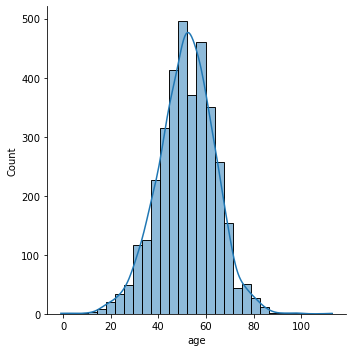

In [201]:
sns.displot(df_joined['age'], kde=True, bins=30) # Distribution of age values, Positive kurtosis and normal skewness

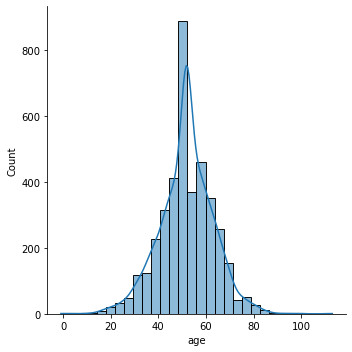

In [202]:
sns.displot(copy_joined['age'], kde=True, bins=30)

Po chýbajúce hodnoty pre atribút age sme nahradili priemerom celkového atribútu. Výsledkom je, že jeho rozdelenie je o dosť viac špicaté, takže sa ešte menej podobá na normálové rozdelenie ako pred doplnením chýbajúcich hodnôt.

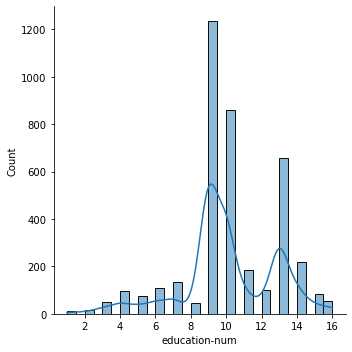

In [203]:
sns.displot(df_joined['education-num'], kde=True, bins=30)

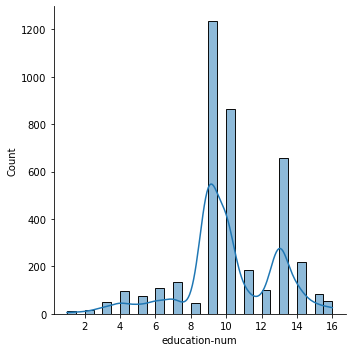

In [204]:
copy_joined['education-num'] = imp.fit_transform(copy_joined[['education-num']])
copy_joined[nan_map]
sns.displot(copy_joined['education-num'], kde=True, bins=30)

Pre atribút education-num bola iba jedna vychýlená hodnota, a preto po jej doplnení to nijako neovplyvnilo rozdelenie distribúcie. Vyzerá to tak, že tomuto atribútu viacej pomôže nahradenie outlierov.

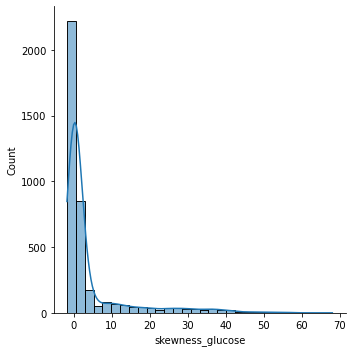

In [205]:
sns.displot(df_joined['skewness_glucose'], kde=True, bins=30)

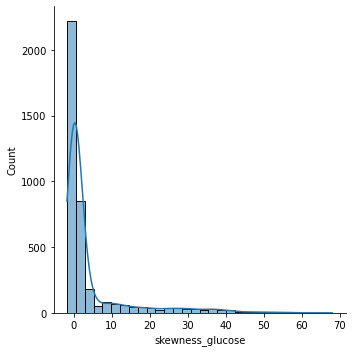

In [206]:
copy_joined['skewness_glucose'] = imp.fit_transform(copy_joined[['skewness_glucose']])
copy_joined[nan_map]
sns.displot(copy_joined['skewness_glucose'], kde=True, bins=30)

Atribút skewness_glucose opäť obsahoval iba jednu, chýbajúcu hodnotu, ktorú keď sme doplnili, tak to distribúciu neupravilo. Avšak niektoré namerané hodnoty sú celkom extrémne oproti priemerným a preto nahradenie vychýlených hodnôt ju môže zlepšiť.

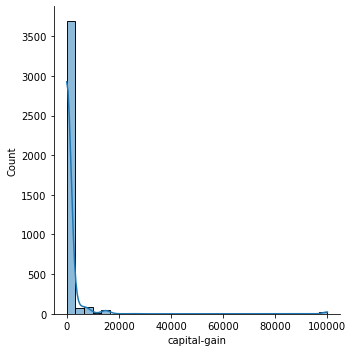

In [207]:
sns.displot(df_joined['capital-gain'], kde=True, bins=30)

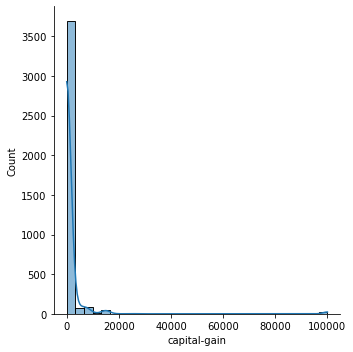

In [208]:
copy_joined['capital-gain'] = imp.fit_transform(copy_joined[['capital-gain']])
copy_joined[nan_map]
sns.displot(copy_joined['capital-gain'], kde=True, bins=30)

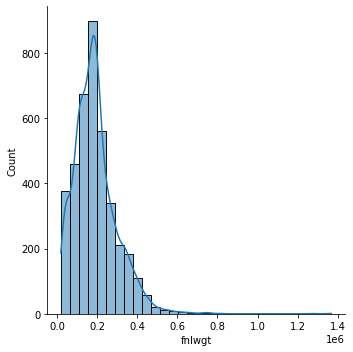

In [209]:
sns.displot(df_joined['fnlwgt'], kde=True, bins=30)

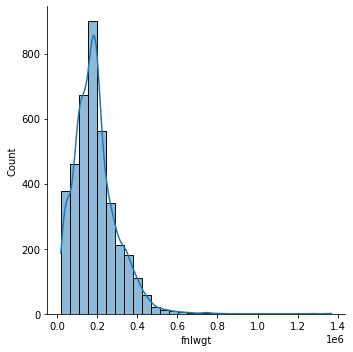

In [210]:
copy_joined['fnlwgt'] = imp.fit_transform(copy_joined[['fnlwgt']])
copy_joined[nan_map]
sns.displot(copy_joined['fnlwgt'], kde=True, bins=30)

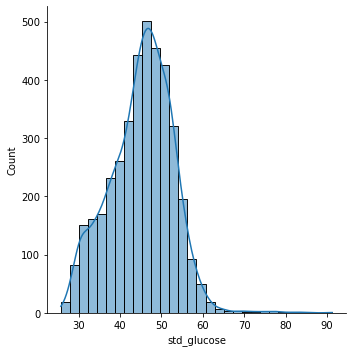

In [211]:
sns.displot(df_joined['std_glucose'], kde=True, bins=30)

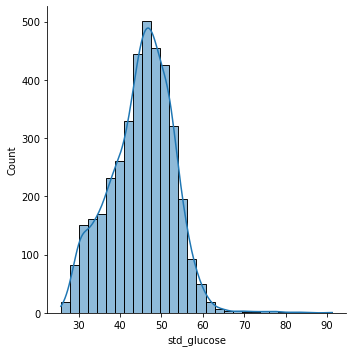

In [212]:
copy_joined['std_glucose'] = imp.fit_transform(copy_joined[['std_glucose']])
copy_joined[nan_map]
sns.displot(copy_joined['std_glucose'], kde=True, bins=30)

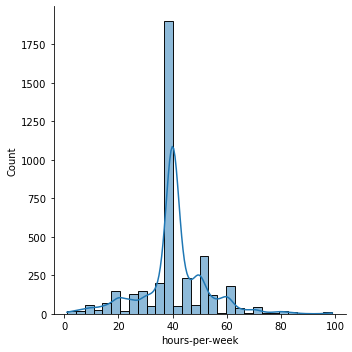

In [213]:
sns.displot(df_joined['hours-per-week'], kde=True, bins=30)

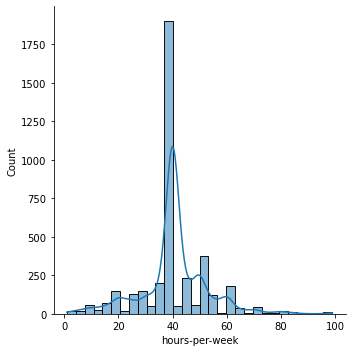

In [214]:
copy_joined['hours-per-week'] = imp.fit_transform(copy_joined[['hours-per-week']])
copy_joined[nan_map]
sns.displot(copy_joined['hours-per-week'], kde=True, bins=30)

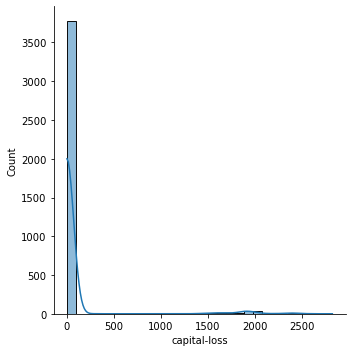

In [215]:
sns.displot(df_joined['capital-loss'], kde=True, bins=30)

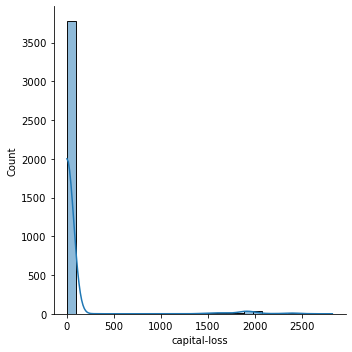

In [216]:
copy_joined['capital-loss'] = imp.fit_transform(copy_joined[['capital-loss']])
copy_joined[nan_map]
sns.displot(copy_joined['capital-loss'], kde=True, bins=30)

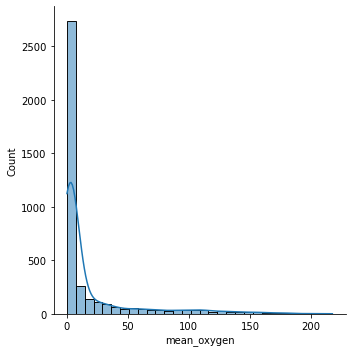

In [217]:
sns.displot(df_joined['mean_oxygen'], kde=True, bins=30)

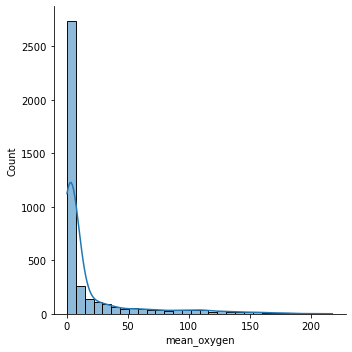

In [218]:
copy_joined['mean_oxygen'] = imp.fit_transform(copy_joined[['mean_oxygen']])
copy_joined[nan_map]
sns.displot(copy_joined['mean_oxygen'], kde=True, bins=30)

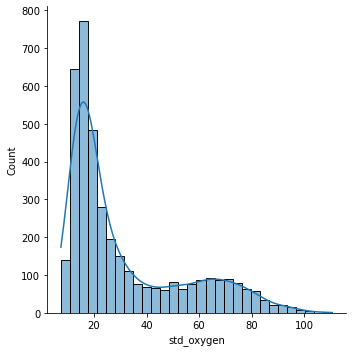

In [219]:
sns.displot(df_joined['std_oxygen'], kde=True, bins=30)

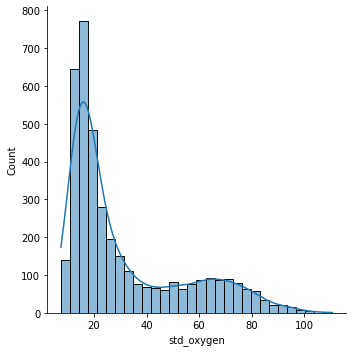

In [220]:
copy_joined['std_oxygen'] = imp.fit_transform(copy_joined[['std_oxygen']])
copy_joined[nan_map]
sns.displot(copy_joined['std_oxygen'], kde=True, bins=30)

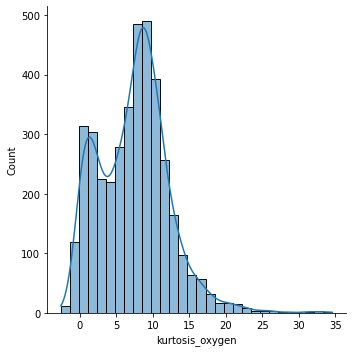

In [221]:
sns.displot(df_joined['kurtosis_oxygen'], kde=True, bins=30)

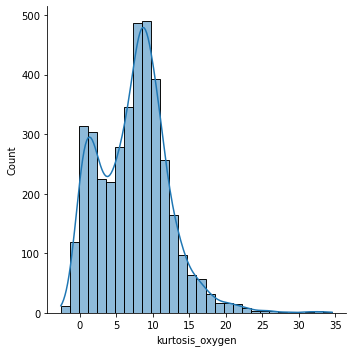

In [222]:
copy_joined['kurtosis_oxygen'] = imp.fit_transform(copy_joined[['kurtosis_oxygen']])
copy_joined[nan_map]
sns.displot(copy_joined['kurtosis_oxygen'], kde=True, bins=30)

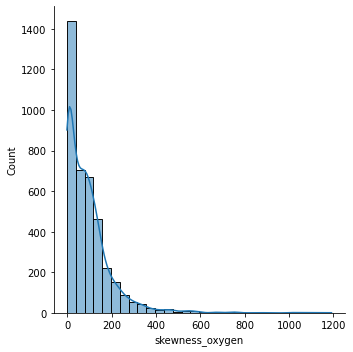

In [223]:
sns.displot(df_joined['skewness_oxygen'], kde=True, bins=30)

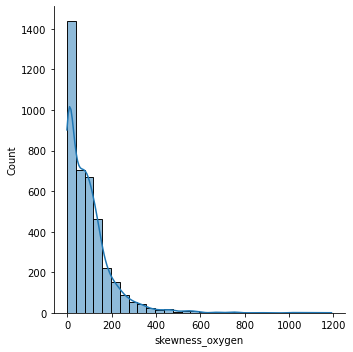

In [224]:
copy_joined['skewness_oxygen'] = imp.fit_transform(copy_joined[['skewness_oxygen']])
copy_joined[nan_map]
sns.displot(copy_joined['skewness_oxygen'], kde=True, bins=30)

## Zhrnutie doplňania chýbajúcich hodnôt podľa stratégie priemeru
Ako je možné vidieť, postupom času sme prestali opisovať distribúcie grafov, pretože sa stále opakoval ten istý proces, kde doplnenie chýbajúcej hodnoty/hodnôt nezmenilo distribúciou, pretože sa väčšinou dopĺňala jedna, max 2 hodnoty. Iba pre atribút age bolo chýbajúcich hodnôt viac, ale ich doplnenie nám celkom zhoršilo distribúciu. Avšak distribúcie atribútov ako fnlwgt, std_glucose, std_oxygen, kurtosis_oxygen, skewness_oxygen sa celkom podobajú na klasické normálové rozdelenie, len je potrebné vyriešieť problém s outliermi, ktorých tam je kopec.

# Riešenie vychýlených hodnôt

In [225]:
import scipy.stats as stats

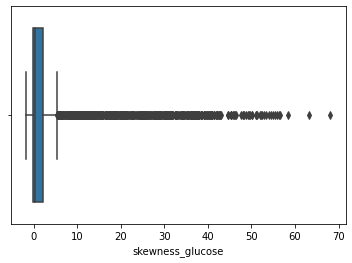

In [226]:
sns.boxplot(x='skewness_glucose', data=df_joined)

Skewness:  nan


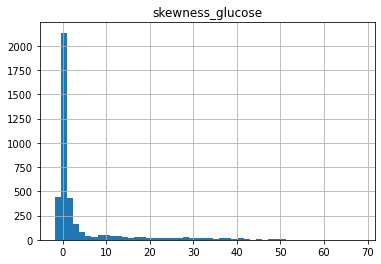

In [227]:
pom = df_joined['skewness_glucose'].hist(bins=50)
pom.set_title('skewness_glucose')

print('Skewness: ', stats.skew(df_joined['skewness_glucose']))

cviko 6

In [228]:
descr = df_joined['skewness_glucose'].describe()
whisker_r = descr['75%'] + (1.5 * (descr['75%'] - descr['25%']))
whisker_r

descr = df_joined['skewness_glucose'].describe()
whisker_r = np.min([descr['max'], descr['75%'] + (1.5 * (descr['75%'] - descr['25%']))])
whisker_l = np.max([descr['min'], descr['25%'] - (1.5 * (descr['75%'] - descr['25%']))])
whisker_l, whisker_r

(-1.755331667, 5.389685531125)

3932 záznamov celkovo

In [229]:
(df_joined['skewness_glucose']).count()

3932

678 outlierov

In [230]:
sum(df_joined['skewness_glucose'] > whisker_r) + sum(df_joined['skewness_glucose'] < whisker_l)

678

In [231]:
for i in df_joined.index:
    if ((df_joined.loc[i]['skewness_glucose'] > whisker_r) or (df_joined.loc[i]['skewness_glucose'] < whisker_l)):
        df_joined = df_joined.drop([i])

Eliminovanie outlierov - v našom prípade najmä chorých. To je správne?

In [232]:
(df_joined['skewness_glucose']).count()

3254

Tomuto nechápem

Skewness: nan


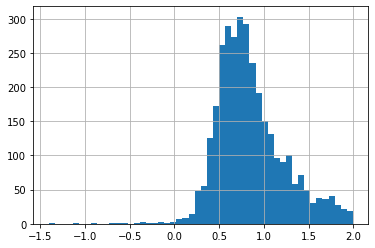

In [233]:
transformed = np.log(df_joined['skewness_glucose']+2) # zbavíme sa záporných čísel, aby šli zlogaritmovať
pom = pd.Series(transformed).hist(bins = 50)
print("Skewness:", stats.skew(transformed))

C:\Users\vanco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


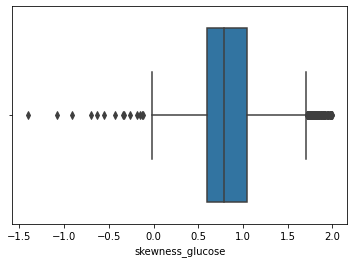

In [234]:
import seaborn
from sklearn import preprocessing
seaborn.boxplot(transformed)

In [235]:
from scipy.stats import boxcox

C:\Users\vanco\anaconda3\lib\site-packages\scipy\stats\morestats.py:1042: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


8.472135811722177


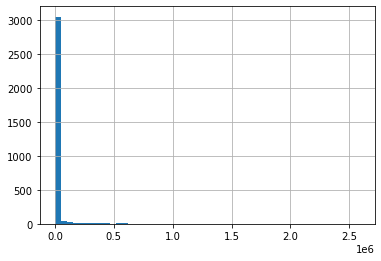

In [236]:
transformed, att = boxcox(df_joined['skewness_glucose'] + 2)# boxcox vrati transformovane data a parametre transformacie. Tie viem zafixovat a v tom pripade mi to vrati len transformovane data
pom = pd.Series(transformed).hist(bins=50)
print(att)

In [237]:
(df_joined['skewness_glucose']).count()

3254

In [238]:
# calculate summary statistics
data_mean, data_std = mean(df_joined['skewness_glucose']), std(df_joined['skewness_glucose'])
print('len=', len(df_joined['skewness_glucose']), 'mean=', data_mean, 'std=', data_std)

# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off 
print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

# identify outliers
outliers = [x for x in df_joined['skewness_glucose'] if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))

# remove outliers
for i in df_joined.index:
    if ((df_joined.loc[i]['skewness_glucose'] >= upper) or (df_joined.loc[i]['skewness_glucose'] <= lower)):
        df_joined = df_joined.drop([i])


len= 3255 mean= 0.5231524147037476 std= 1.1100848130801635
cutoff= 3.3302544392404902 lower= -2.807102024536743 upper= 3.8534068539442377
Identified outliers: 85


In [239]:
(df_joined['skewness_glucose']).count()

3169

Skewness:  nan


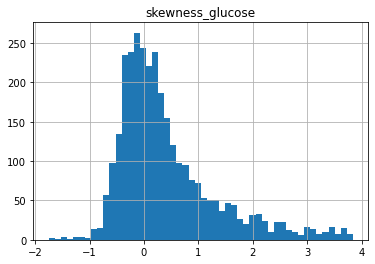

In [240]:
pom = df_joined['skewness_glucose'].hist(bins=50)
pom.set_title('skewness_glucose')

print('Skewness: ', stats.skew(df_joined['skewness_glucose']))

# Riešenie chýbajúcich hodnôt druhá stratégia

# Transformácia atribútu/ov pomocou Power transform (logaritmus, odmocnina a pod.)

# Opätovná realizácia podstatných častí prieskumnej analýzy


    Očakáva sa že dokumentujete zmeny distribúcie hodnôt po realizácii predspracovania
    Následne dokumentujete LEN zmeny v prieskumnej analýze